In [2]:
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import contextily as ctx
import os

## Data Exploration

In [3]:
# Variables that can be extracted from an example netCDF file

file_path = '/Volumes/Seagate Backup Plus Drive/USRA/ACOS V9/Data/acos_LtCO2_090420_v205205_B9213A_200310205144s.nc4'
data = Dataset(file_path, 'r')

print("Variables in the NetCDF file:")
for var_name in data.variables:
    print(var_name)

Variables in the NetCDF file:
sounding_id
levels
bands
date
latitude
longitude
time
solar_zenith_angle
sensor_zenith_angle
xco2_quality_flag
xco2_qf_bitflag
source_files
file_index
xco2
xco2_uncertainty
xco2_apriori
pressure_levels
co2_profile_apriori
xco2_averaging_kernel
pressure_weight


## Analysis

In [4]:
# Dataset: ACOS GOSAT/TANSO-FTS Level 2 bias-corrected XCO2 and other select fields from the full-physics retrieval aggregated as daily files V7.3
# Download Method: Get Original Files
# Date Range: 2009-04-21 to 2016-06-01
# Format: netCDF

# List to store DataFrames for each file
dfs = []

# Iterate through each file in the directory
for filename in os.listdir("/Volumes/Seagate Backup Plus Drive/USRA/ACOS V9/Data"):
    if filename.endswith(".nc4"):
        file_path = os.path.join("/Volumes/Seagate Backup Plus Drive/USRA/ACOS V9/Data", filename)
        
        # Open NetCDF file
        data = Dataset(file_path, 'r')

        # Extract variables
        time_var = data.variables['time']
        xco2_var = data.variables['xco2']
        xco2_qf_var = data.variables['xco2_quality_flag']
        latitude_var = data.variables['latitude']
        longitude_var = data.variables['longitude']
        

        # Convert time to a datetime
        time_values = pd.to_datetime(time_var[:], unit='s')

        # Create DataFrame with time and CO2 levels
        df = pd.DataFrame({'Time': time_values, 'CO2 Levels': xco2_var[:].flatten(), 'Latitude': latitude_var[:].flatten(), 'Longitude': longitude_var[:].flatten(), 'xco2_quality_flag': xco2_qf_var[:].flatten()})

        # Append DataFrame to the list
        dfs.append(df)

In [5]:
# Printing dataframe for reference
print(dfs[0].head(5))

                           Time  CO2 Levels   Latitude   Longitude  \
0 2012-05-10 00:19:49.720080853  392.613068  78.809578  -61.848637   
1 2012-05-10 00:19:54.329349756  384.455231  78.810051  -61.867928   
2 2012-05-10 00:19:58.939141750  382.395111  78.810890  -61.896099   
3 2012-05-10 00:22:44.878816843  382.852203  77.865448 -114.118752   
4 2012-05-10 00:25:35.426674843  388.028564  68.541534 -145.882004   

   xco2_quality_flag  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  


### Task 1

In [6]:
# Combine all dataframes into one
df = pd.concat(dfs, ignore_index=True)
# Size of dataset
len(dfs)

# Calculate monthly mean CO2 concentration
monthly_means = df.resample('M', on='Time').mean()
monthly_means_1 = monthly_means

/var/folders/_6/ng9nyncd4fj46czxf2xywqc40000gp/T/ipykernel_82315/4229926431.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means = df.resample('M', on='Time').mean()


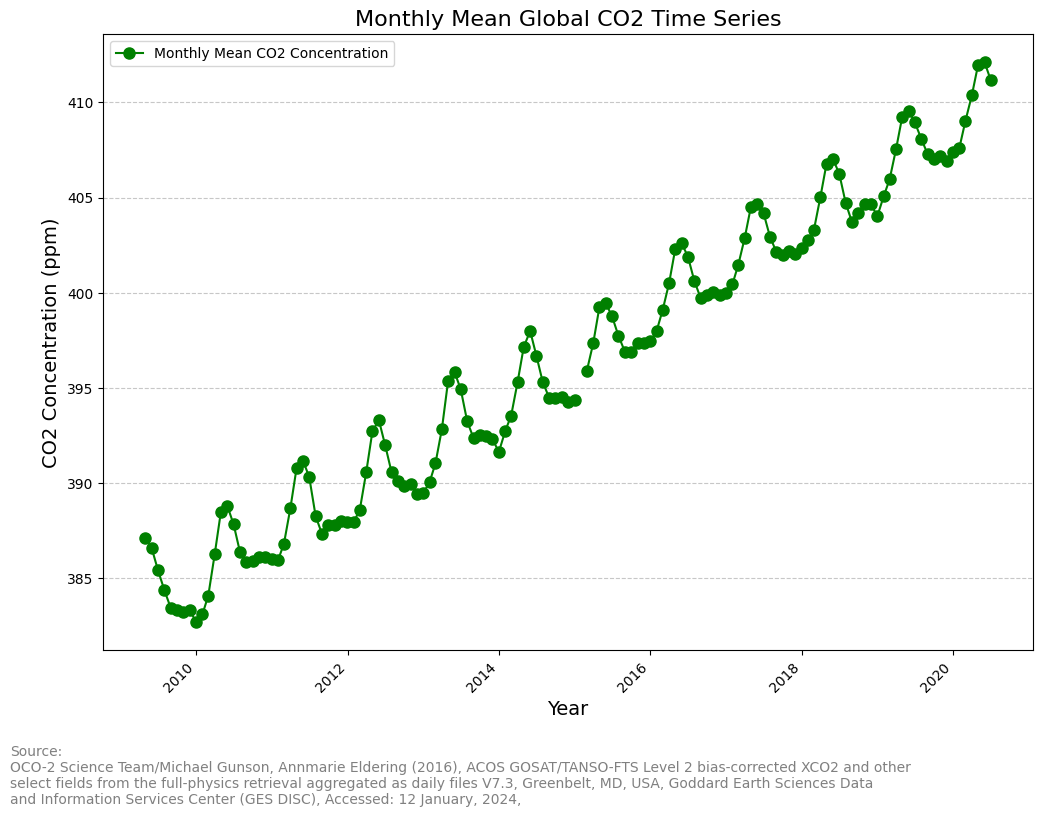

In [ ]:
# Plot monthly mean time series
plt.figure(figsize=(12, 8))
plt.plot(monthly_means.index, monthly_means['CO2 Levels'], label='Monthly Mean CO2 Concentration', color='green', linestyle='-', marker='o', markersize=8)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Concentration (ppm)', fontsize=14)
plt.title('Monthly Mean Global CO2 Time Series', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
source = '''Source:
OCO-2 Science Team/Michael Gunson, Annmarie Eldering (2016), ACOS GOSAT/TANSO-FTS Level 2 bias-corrected XCO2 and other 
select fields from the full-physics retrieval aggregated as daily files V7.3, Greenbelt, MD, USA, Goddard Earth Sciences Data
and Information Services Center (GES DISC), Accessed: 12 January, 2024,'''
plt.annotate(source, xy=(-0.1, -0.25), xycoords='axes fraction', ha='left', fontsize=10, color='gray')
plt.legend()
plt.show()

### Task 2

In [ ]:
# Only keep dataframe rows where quality is good. In this case, good data is represented binarily by 0.
df2 = df[df['xco2_quality_flag'] == 0]
print(df2.head())

                            Time  CO2 Levels   Latitude   Longitude  \
13 2012-05-10 00:38:43.639176846  394.555542  23.297543 -176.699051   
15 2012-05-10 00:38:52.857272148  394.077515  23.299534 -176.703552   
16 2012-05-10 00:40:06.608431101  395.131104  18.252575 -177.772812   
17 2012-05-10 00:40:11.217780352  395.496063  18.252779 -177.775284   
18 2012-05-10 00:40:15.827572346  394.922333  18.255274 -177.776917   

    xco2_quality_flag  
13                  0  
15                  0  
16                  0  
17                  0  
18                  0  


In [ ]:
monthly_means = df2.resample('M', on='Time').mean()

/var/folders/_6/ng9nyncd4fj46czxf2xywqc40000gp/T/ipykernel_60369/1208018905.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means = df2.resample('M', on='Time').mean()


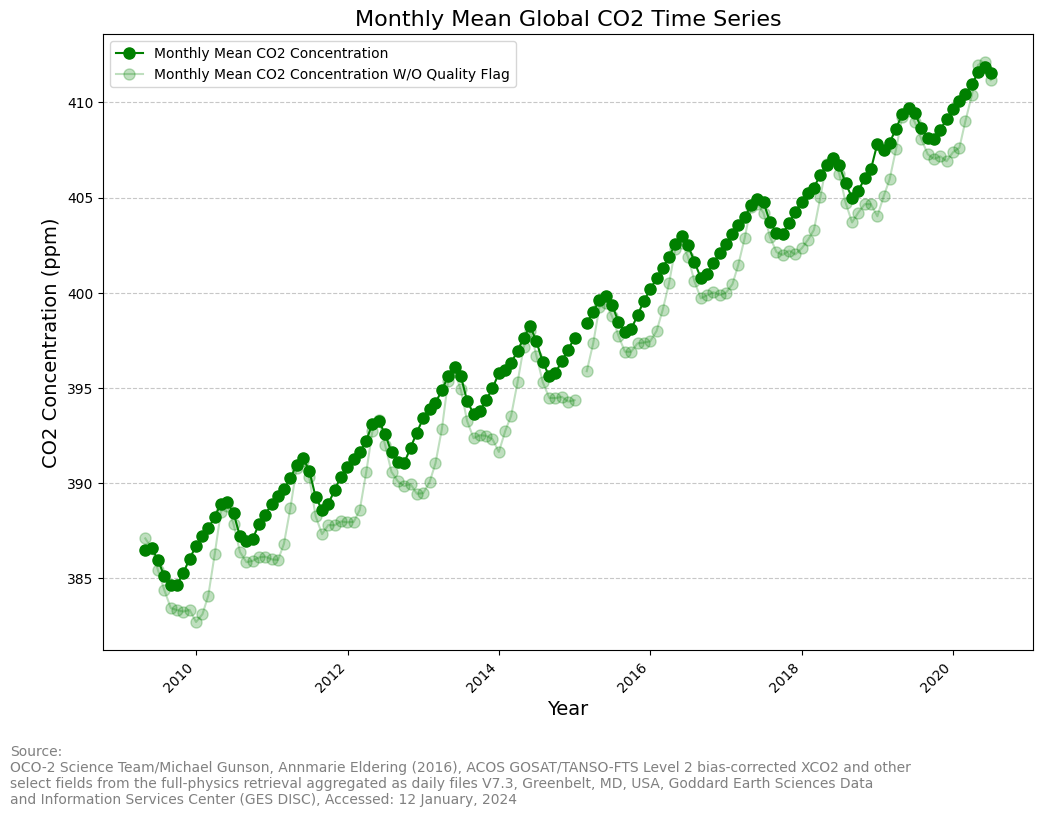

In [ ]:
# Plot monthly mean time series
plt.figure(figsize=(12, 8))
plt.plot(monthly_means.index, monthly_means['CO2 Levels'], label='Monthly Mean CO2 Concentration', color='green', linestyle='-', marker='o', markersize=8)
plt.plot(monthly_means_1.index, monthly_means_1['CO2 Levels'], label='Monthly Mean CO2 Concentration W/O Quality Flag', color='green', linestyle='-', marker='o', alpha = 0.25, markersize=8)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Concentration (ppm)', fontsize=14)
plt.title('Monthly Mean Global CO2 Time Series', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
source = '''Source:
OCO-2 Science Team/Michael Gunson, Annmarie Eldering (2016), ACOS GOSAT/TANSO-FTS Level 2 bias-corrected XCO2 and other 
select fields from the full-physics retrieval aggregated as daily files V7.3, Greenbelt, MD, USA, Goddard Earth Sciences Data
and Information Services Center (GES DISC), Accessed: 12 January, 2024'''
plt.annotate(source, xy=(-0.1, -0.25), xycoords='axes fraction', ha='left', fontsize=10, color='gray')
plt.legend()
plt.show()

### Task 3

In [ ]:
# Latitude bins for every 10 degrees
latitude_bins = np.arange(-90, 91, 10)
latitude_bins

array([-90, -80, -70, -60, -50, -40, -30, -20, -10,   0,  10,  20,  30,
        40,  50,  60,  70,  80,  90])

In [ ]:
# Print the lowest and highest latitude values
lowest_latitude = df2['Latitude'].min()
highest_latitude = df2['Latitude'].max()

print("Lowest Latitude:", lowest_latitude)
print("Highest Latitude:", highest_latitude)

Lowest Latitude: -56.514072
Highest Latitude: 83.14537


In [ ]:
# Define latitude bands for both northern and southern hemispheres
latitude_bands = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50),
                  (-10, 0), (-20, -10), (-30, -20), (-40, -30), (-50, -40)]

# Dictionary to store the results
monthly_means_dict = {}

# Loop over latitude bands
for i, (min_lat, max_lat) in enumerate(latitude_bands):
    temp_df = df2[(df2['Latitude'] >= min_lat) & (df2['Latitude'] < max_lat)]
    monthly_means_temp = temp_df.resample('M', on='Time').mean()
    monthly_means_dict[i+1] = monthly_means_temp

# Now monthly_means_dict contains the monthly means for each latitude band

/var/folders/_6/ng9nyncd4fj46czxf2xywqc40000gp/T/ipykernel_60369/635713029.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means_temp = temp_df.resample('M', on='Time').mean()
/var/folders/_6/ng9nyncd4fj46czxf2xywqc40000gp/T/ipykernel_60369/635713029.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means_temp = temp_df.resample('M', on='Time').mean()
/var/folders/_6/ng9nyncd4fj46czxf2xywqc40000gp/T/ipykernel_60369/635713029.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means_temp = temp_df.resample('M', on='Time').mean()
/var/folders/_6/ng9nyncd4fj46czxf2xywqc40000gp/T/ipykernel_60369/635713029.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means_temp = temp_df.resample('M', on='Time').mean()
/var/folders/_6/ng9nyncd

In [ ]:
for i, band in enumerate(latitude_bands):
    print(f"monthly_means_dict[{i+1}]: {band}")

monthly_means_dict[1]: (0, 10)
monthly_means_dict[2]: (10, 20)
monthly_means_dict[3]: (20, 30)
monthly_means_dict[4]: (30, 40)
monthly_means_dict[5]: (40, 50)
monthly_means_dict[6]: (-10, 0)
monthly_means_dict[7]: (-20, -10)
monthly_means_dict[8]: (-30, -20)
monthly_means_dict[9]: (-40, -30)
monthly_means_dict[10]: (-50, -40)


/var/folders/_6/ng9nyncd4fj46czxf2xywqc40000gp/T/ipykernel_60369/2070409251.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


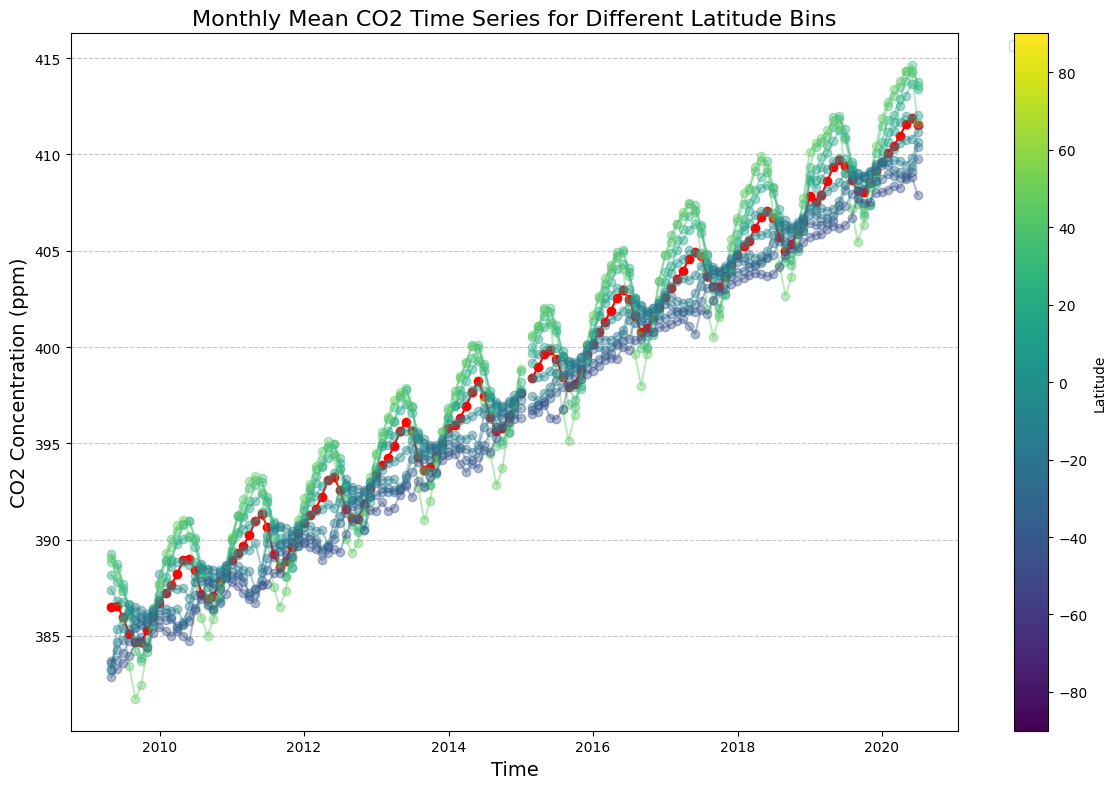

In [ ]:
plt.figure(figsize=(12, 8))

# Creating the colormap
colormap = plt.get_cmap("viridis")
normalize = plt.Normalize(vmin=-90, vmax=90)

# Montly Mean XO2 emissions plot
plt.plot(monthly_means.index, monthly_means['CO2 Levels'], color='Red', linestyle='-', marker='o')

# Mapping latitude bands to their corresponding colors
latitude_band_colors = {i + 1: colormap(normalize((latitude_bands[i][0] + latitude_bands[i][1]) / 2))
                        for i in range(len(latitude_bands))}

for i, data in monthly_means_dict.items():
     color = latitude_band_colors[i]
     plt.plot(data.index, data['CO2 Levels'], linestyle='-', marker='o', alpha=0.4, color=color)

# Colorbar
sm = plt.cm.ScalarMappable(cmap=colormap, norm=normalize)
cbar = plt.colorbar(sm, label='Latitude', ax=plt.gca())

# Graph settings
plt.xlabel('Time', fontsize=14)
plt.ylabel('CO2 Concentration (ppm)', fontsize=14)
plt.title('Monthly Mean CO2 Time Series for Different Latitude Bins', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Specific Month Analysis

In [ ]:
df2_copy = df2[(df2['Time'] > '2010-01-01') & (df2['Time'] < '2010-01-31')]

In [ ]:
df2_copy.set_index('Time', inplace=True)
daily_means = df2_copy.resample('D').mean()  # Resample to daily averages

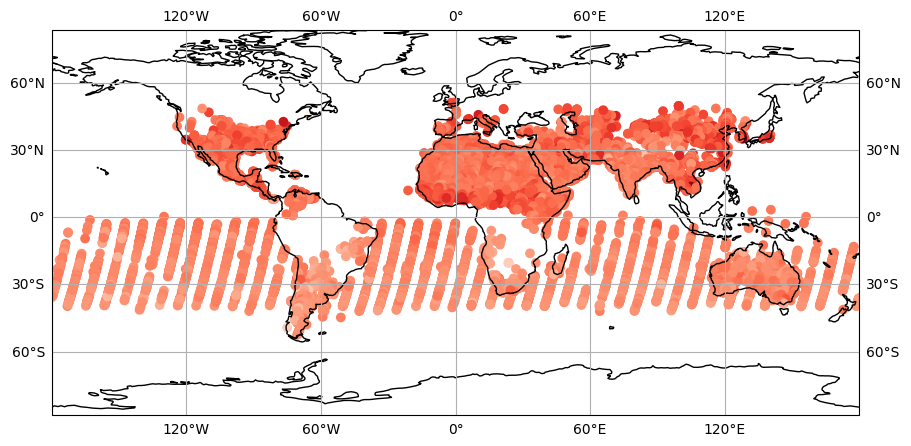

In [ ]:
# Bounding box for the area northeast of Denver, CO
latitudes = df['Latitude']
longitudes = df['Longitude']
extent = [longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()]

fig, ax = plt.subplots(figsize=(14, 5), subplot_kw={'projection': ccrs.PlateCarree()})  # Wider figure
ax.set_extent([longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()], crs=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

ax.scatter(df2_copy["Longitude"], df2_copy["Latitude"], c=df2_copy["CO2 Levels"], cmap='Reds')